In [12]:
import pandas
import graphistry
import networkx as nx

graphistry.register(api=1, username='arpan-vs', password='Avs@2210', protocol='https', server='hub.graphistry.com')

In [13]:
# Parse CSV using Pandas
links = pandas.read_csv('email-Eu-core-short.csv')

In [14]:
# Let's have a peak at our data by printing the first three rows
links[:3]

,Source,Target,Label
0,0,1,1
1,2,3,21
2,2,4,21


In [18]:
# Plot graph using the source/target columns as source/destination of edges
plotter = graphistry.bind(source='Source', destination='Target', point_color ='Label')
plotter.plot(links)

/home/codespace/.python/current/lib/python3.10/site-packages/graphistry/util.py:266: RuntimeWarning: Attribute "Label" bound to _point_color does not exist.
  warnings.warn(RuntimeWarning(msg))


/tmp/ipykernel_11950/3286559023.py:34: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  node1, node2 = random.sample(G.nodes, 2)


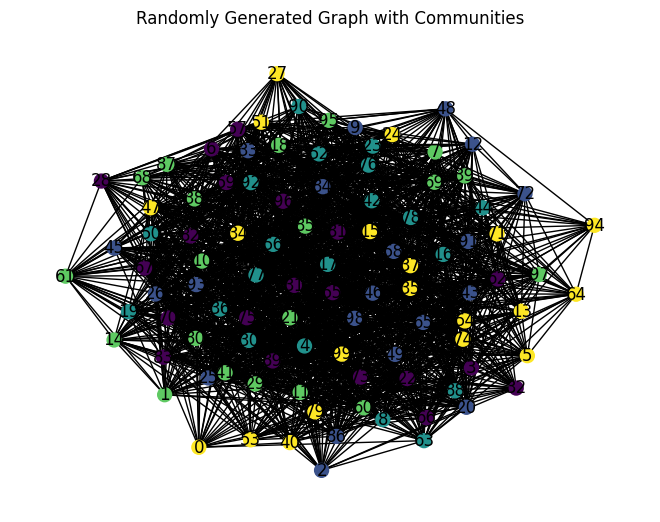

In [26]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Create a graph
G = nx.Graph()

# Number of nodes and communities
num_nodes = 100
num_communities = 5

# Create nodes with community assignments
nodes_per_community = num_nodes // num_communities
community_assignments = []
for i in range(num_communities):
    community_assignments.extend([i] * nodes_per_community)

# Shuffle the nodes to randomize community assignments
random.shuffle(community_assignments)

# Add nodes with community information to the graph
for node, community in enumerate(community_assignments):
    G.add_node(node, community=community)

# Add random edges within communities
for community in range(num_communities):
    community_nodes = [node for node in G.nodes() if G.nodes[node]['community'] == community]
    random.shuffle(community_nodes)
    for i in range(len(community_nodes) - 1):
        G.add_edge(community_nodes[i], community_nodes[i + 1])

# Add random edges between communities
for _ in range(2000 - num_nodes):
    node1, node2 = random.sample(G.nodes, 2)
    G.add_edge(node1, node2)

# Position the nodes for visualization
pos = nx.spring_layout(G)

# Separate nodes by community for plotting
node_colors = [G.nodes[node]['community'] for node in G.nodes]

# Draw the graph with community colors
nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.get_cmap('viridis'), node_size=100)
plt.title("Randomly Generated Graph with Communities")
plt.show()
